# 1. Knihovny a moduly pro matematické výpočty
1. Skalární součin
2. Norma vektoru
3. Determinant
4. Určitý integrál
5. Odmocnina

- a) kód ve standardním Pythonu
- b) kód napsaný pomocí knihovny NumPy

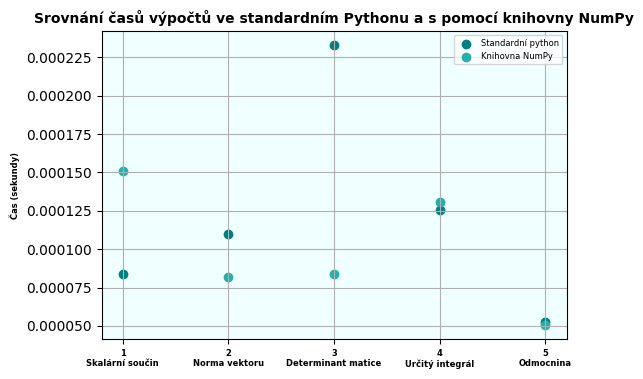

In [21]:
# Tvorba grafu pro srovnání výsledků 

import matplotlib.pyplot as plt

priklady = ["1", "2", "3", "4", "5"]
popisky = ["Skalární součin","Norma vektoru", "Determinant matice", "Určitý integrál", "Odmocnina"]
cas_a = [cas_1_a, cas_2_a, cas_3_a, cas_4_a, cas_5_a]
cas_b = [cas_1_b, cas_2_b, cas_3_b, cas_4_b, cas_5_b]

plt.figure(figsize=(6, 4),)
plt.scatter(priklady, cas_a, marker="o",color="teal",label="Standardní python")
plt.scatter(priklady, cas_b, marker="o",color="lightseagreen",label="Knihovna NumPy")
plt.gca().set_facecolor("azure")
plt.ylabel("Čas (sekundy)",fontweight="bold",fontsize=6)
plt.title("Srovnání časů výpočtů ve standardním Pythonu a s pomocí knihovny NumPy",fontweight="bold",fontsize=10)
plt.xticks(range(len(priklady)), [f'{priklad}\n{popisek}' for priklad, popisek in zip(priklady, popisky)],fontweight="bold",fontsize=6)
plt.grid(True)
plt.legend(fontsize=6)
plt.show()

In [5]:
# 1. a)
from typing import List
import time

start = time.perf_counter()

def skalarni_soucin(u:List[int],v:List[int]) -> int:
    skalarni_soucin = 0
    if len(u) != len(v):
        return "Vektory musí mít stejnou dimenzi!"
    for i in range(len(u)):
        skalarni_soucin += u[i]*v[i]
    return skalarni_soucin

end = time.perf_counter()

cas_1_a = end - start

print(f"výpočet = {skalarni_soucin([1,1,1,1],[1,1,1,1])}, čas = {end - start} sekund")
print(cas_1_a)



výpočet = 4, čas = 8.349999552592635e-05 sekund
8.349999552592635e-05


In [6]:
# 1. b)
import numpy as np
import time

start = time.perf_counter()

def skalarni_soucin(u,v):
    skalarni_soucin = np.dot(u,v)
    return skalarni_soucin

u = np.array([1,1,1,1])
v = np.array([1,1,1,1])
skalarni_soucin(u,v)

end = time.perf_counter()

cas_1_b = end - start

print(f"výpočet = {skalarni_soucin(u,v)}, čas = {end - start} sekund")

výpočet = 4, čas = 0.00015120001626200974 sekund


In [7]:
# 2. a) 
import time
from typing import List

start = time.perf_counter()

def norma_vektoru(u: List[int]) -> int:
    norma = 0
    for i in range(len(u)):
        norma += u[i] * u[i]
    norma = norma ** 0.5
    return norma

end = time.perf_counter()

cas_2_a = end - start

print(f"výpočet = {norma_vektoru([1,2,3])}, čas = {end - start} sekund")

výpočet = 3.7416573867739413, čas = 0.0001100999943446368 sekund


In [8]:
# 2. b)
import time
import numpy as np

start = time.perf_counter()

def norma_vektoru(v):
    return np.linalg.norm(v)

vektor = np.array([1, 2, 3])

end = time.perf_counter()

cas_2_b = end - start

print(f"výsledek = {norma_vektoru(vektor)}, čas = {end - start} sekund")

výsledek = 3.7416573867739413, čas = 8.19999841041863e-05 sekund


In [9]:
# 3. a)
import time

start = time.perf_counter()

def determinant(matice):
    if len(matice) == 1:
        determinant = matice[0][0]
    if len(matice) == 2:
        determinant = matice[0][0] * matice[1][1] - matice[0][1] * matice[1][0]
    if len(matice) == 3:
        determinant = matice[0][0] * matice[1][1] * matice[2][2] + matice[1][0] * matice[2][1] * matice[0][2] + matice[2][0] * matice[0][1] * matice[1][2] - ( matice[0][2] * matice[1][1] * matice[2][0] + matice[1][2] * matice[2][1] * matice[0][0] + matice[2][2] * matice[0][1] * matice[1][0] )
    return determinant

end = time.perf_counter()

cas_3_a = end - start

print(f"výsledek = {determinant([[1,2,3],[4,5,6],[7,8,9]])}, čas = {end - start} sekund")

výsledek = 0, čas = 0.0002327999973203987 sekund


In [10]:
# 3. b)
import time
import numpy as np

start = time.perf_counter()

def determinant(matice):
    return np.linalg.det(matice)

matice = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

end = time.perf_counter()

cas_3_b = end - start

print(f"výsledek = {determinant(matice)}, čas = {end - start} sekund")

výsledek = 0.0, čas = 8.410000009462237e-05 sekund


In [11]:
# 4. a)
import time 

start = time.perf_counter()

def urcity_integral(f, a, b, n):
    integral = 0
    x = a
    while x < b:
        integral += n * (f(x) + f(x+n))/2
        x += n
    return integral

def f(x):
    return x**2

end = time.perf_counter()

cas_4_a = end - start

print(f"Určitý integrál: {urcity_integral(f, 0, 2, 1/1000)}, čas = {end - start} sekund")


Určitý integrál: 2.6706690004998177, čas = 0.00012569999671541154 sekund


In [12]:
# 4. b)
import numpy as np
import time

start = time.perf_counter()

def urcity_integral(f, a, b, n):
    x_hodnoty = np.arange(a, b, n)
    y_hodnoty = f(x_hodnoty)
    integral = np.trapz(y_hodnoty,x_hodnoty)
    return integral

def f(x):
    return x**2

end = time.perf_counter()

cas_4_b = end - start

print(f"Určitý integrál: {urcity_integral(f, 0, 2, 1/1000)}, čas = {end - start} sekund")


Určitý integrál: 2.6626689995, čas = 0.00013080000644549727 sekund


In [13]:
# 5. a)
import time

start = time.perf_counter()

def vypocet_odmocniny(x):
    return x ** 0.5

end = time.perf_counter()

cas_5_a = end - start

print(f"výpočet = {vypocet_odmocniny(2.586)}, čas = {end - start} sekund")



výpočet = 1.6081044742180155, čas = 5.2499992307275534e-05 sekund


In [14]:
# 5. b)
import time
import numpy as np

start = time.perf_counter()

def vypocet_odmocniny(x):
    return np.sqrt(x)

end = time.perf_counter()

cas_5_b = end - start

print(f"výpočet = {vypocet_odmocniny(2.586)}, čas = {end - start} sekund")


výpočet = 1.6081044742180155, čas = 5.040000542066991e-05 sekund
